# Оценки тестирования по результатам

## Описание

Пусть есть тест с известными правильными ответами и диапазонами ответов на каждый вопрос. 

Для определённости возьмём возможные ответы как 0 или 1.

Сложность каждого задания заранее не известна. 

### Нам нужно

* определить относительную сложность каждого задания исходя из того, сколько участников правильно ответили на него
* рассчитать баллы каждого участника и его место в рейтинге исходя из полученных выше оценок сложности заданий.


In [77]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

__Данные__

In [42]:
# правильные ответы заданий
good = 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1
good

(1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1)

In [70]:
# полученные ответы от участников, построчно
gots = ((0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1), 
        (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1),
        (0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0),
        (1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0),
        (0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0))
gots

((0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1),
 (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0),
 (1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0),
 (0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0))

__Расчёты__

In [58]:
# Расчёт правильности ответов
corr = [[1 if rep[i] == good[i] else 0 for i in xrange(len(good))] for rep in gots]
corr

[[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]]

In [59]:
# число правильных ответов для каждого вопроса
corrbyn = [0 for i in xrange(len(good))]
for v in corr:
    for a in xrange(len(good)):
        corrbyn[a] += v[a]
corrbyn

[1, 4, 2, 4, 2, 4, 4, 4, 3, 4, 4, 2]

In [60]:
# пусть ценности ответов равны, ценности вопросов обратно пропорциональны числу правильно на них ответивших
# рассчитаем ценность каждого вопроса
ngots = len(gots)
qual = [ngots - x for x in corrbyn]
qual

[4, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 3]

In [61]:
# уточнённые ответы с ценностями
corq = [[v[i] * qual[i]  for i in xrange(len(v))] for v in corr]
corq

[[0, 1, 3, 1, 0, 1, 1, 0, 2, 1, 1, 3],
 [0, 1, 3, 1, 0, 1, 1, 1, 0, 0, 0, 3],
 [0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0],
 [4, 1, 0, 0, 3, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 1, 3, 0, 0, 1, 2, 1, 1, 0]]

In [76]:
# суммы баллов каждого участников
balls = [sum(v) for v in corq]
balls

[14, 11, 8, 13, 10]

In [63]:
# победители, отсортированно
wins = sorted(list(enumerate(balls)), key=lambda x: x[1], reverse=True)
wins

[(0, 14), (3, 13), (1, 11), (4, 10), (2, 8)]

__Результаты__

In [69]:
print "\nТаким образом, победил участник №", wins[0][0]+1, "с", wins[0][1], "баллами, затем участник №", wins[1][0]+1, "с", wins[1][1], "баллами, и т.д.\n"


Таким образом, победил участник № 1 с 14 баллами, затем участник № 4 с 13 баллами, и т.д.



In [75]:
# расстановка по местам
for i, u in enumerate(wins):
    print "место %2d -- участник %2d, баллы: %3d" % (i+1, u[0]+1, u[1])

место  1 -- участник  1, баллы:  14
место  2 -- участник  4, баллы:  13
место  3 -- участник  2, баллы:  11
место  4 -- участник  5, баллы:  10
место  5 -- участник  3, баллы:   8


<Container object of 5 artists>

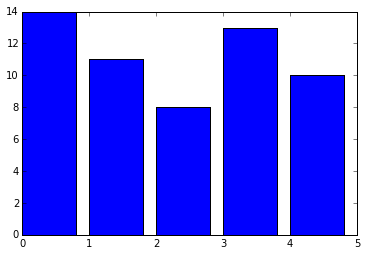

In [105]:
plt.bar(range(len(balls)), balls)